# Yes Bank Stock Price Prediction





### Project type - Regression
Individual - Kunal Yadav


# Problem Statement

The problem statement for developing a Yes Bank stock closing price prediction ML model is to create an accurate and reliable forecasting model. The model should be trained on a subset of historical data and validated on another subset to ensure that it can accurately predict future stock prices. The ultimate objective is to create a robust and accurate model that can help to predict Yes Bank stocks Closing price.

## Let's begin

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

In [2]:
data  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Copy of data_YesBank_StockPrices.csv')
data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [3]:
df = data.copy()
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [4]:
df.shape

(185, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [6]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [7]:
df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


In [8]:
from datetime import datetime
df['Date'] = df['Date'].apply(lambda x : datetime.strptime(x,'%b-%y'))

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


# Date Visualization

Text(0.5, 1.0, 'Distribution of dependent variable : Close')

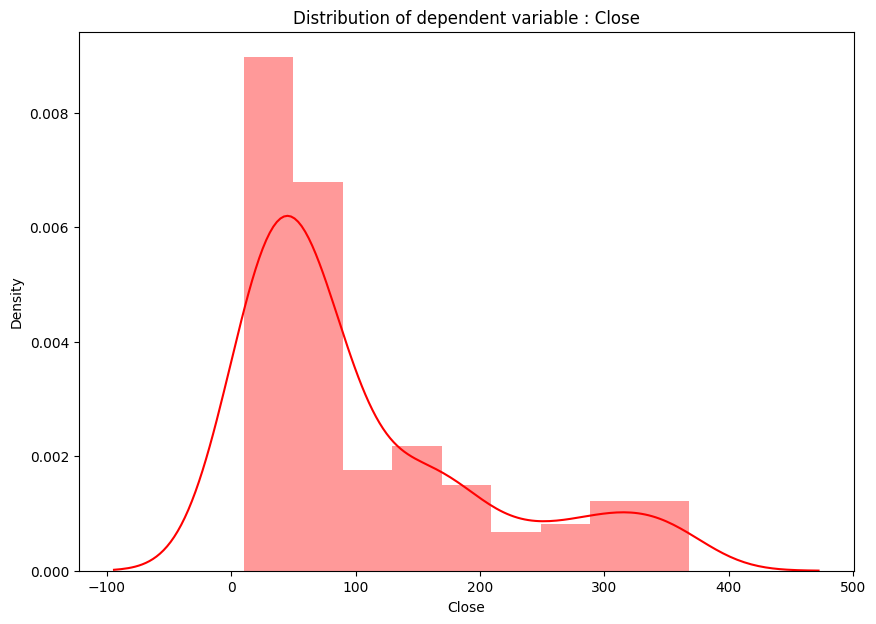

In [10]:
# Dependent variable price distribution plot to understand distribution
plt.rcParams['figure.figsize'] = (10,7)
sns.distplot(df['Close'],color = 'Red')
plt.title('Distribution of dependent variable : Close' )

Text(0.5, 1.0, 'Distribution of dependent variable : Close')

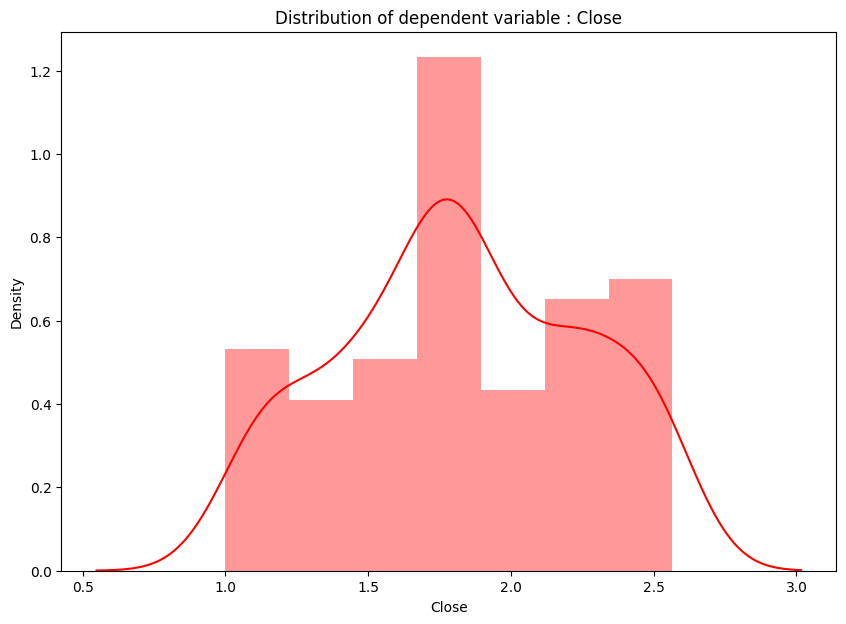

In [11]:
# now apply the log transformation
plt.rcParams['figure.figsize'] = (10,7)
sns.distplot(np.log10(df['Close']),color = 'Red')
plt.title('Distribution of dependent variable : Close' )

In [12]:
numeric_features = df.describe().columns
numeric_features

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

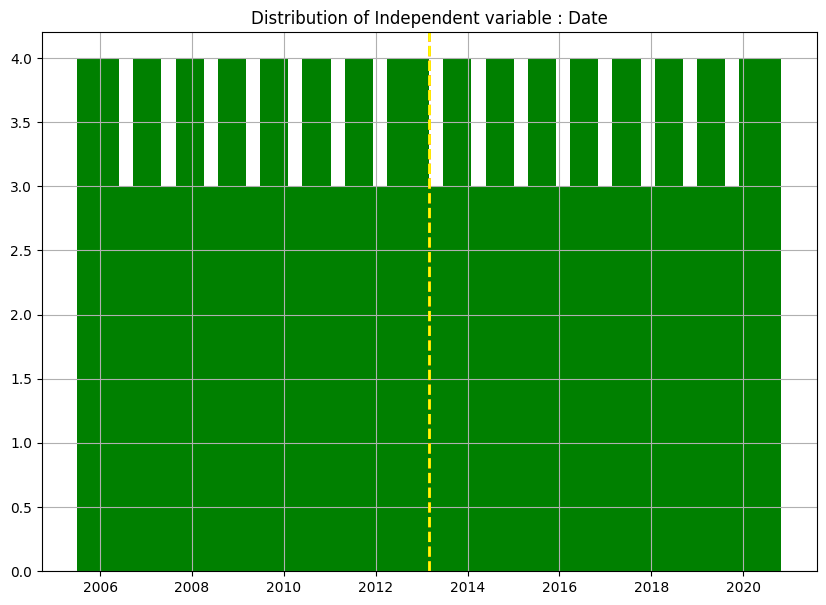

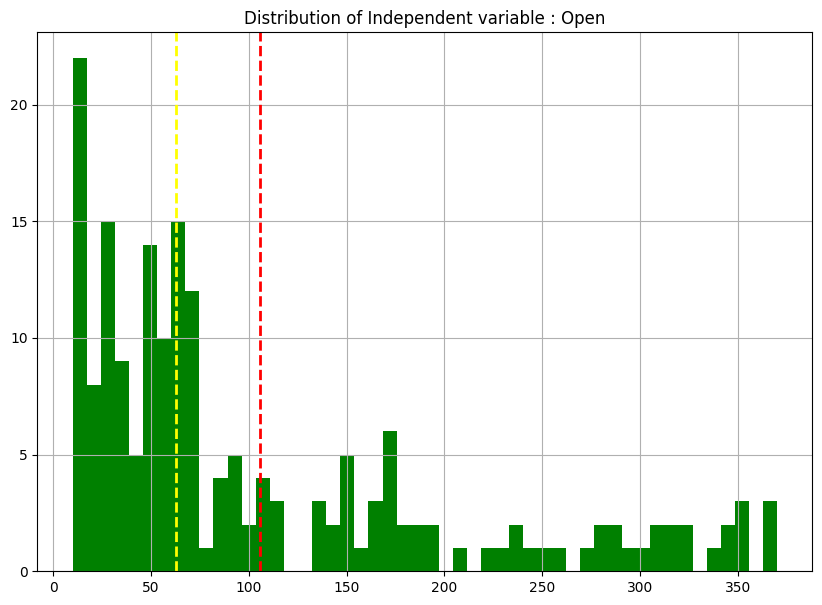

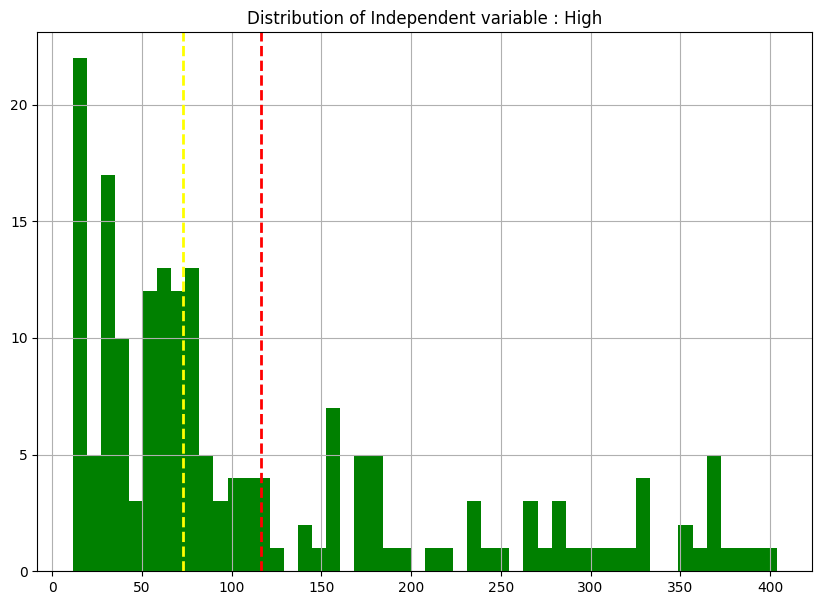

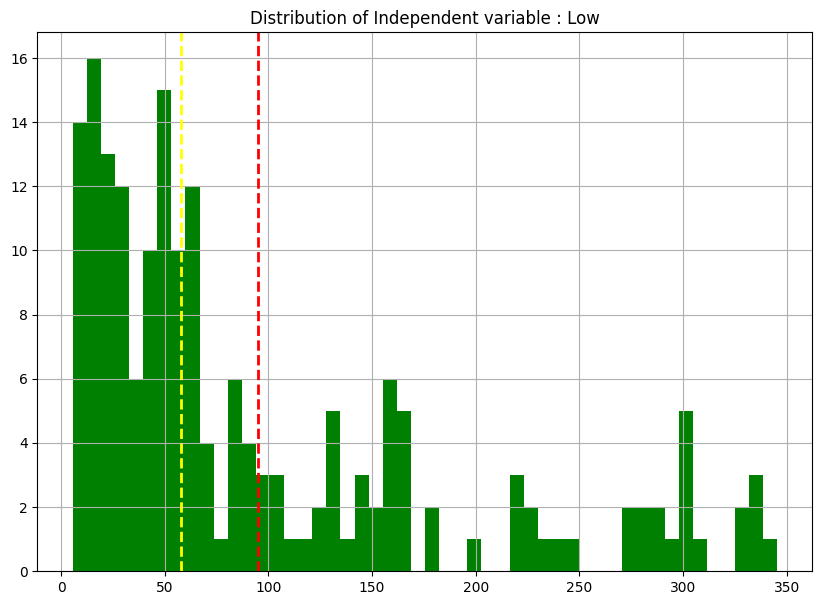

In [13]:
#  now checking skewness of all numeric dependent features
for i in numeric_features[:-1] :
  # we have to exclude the Close(dependent variable) column
    fig = plt.figure(figsize=(10, 7))
    ax = fig.gca()
    feature = df[i]
    feature.hist(bins=50, ax = ax, color = 'green')
    ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='yellow', linestyle='dashed', linewidth=2)
    ax.set_title('Distribution of Independent variable :' + ' ' + i)
plt.show()

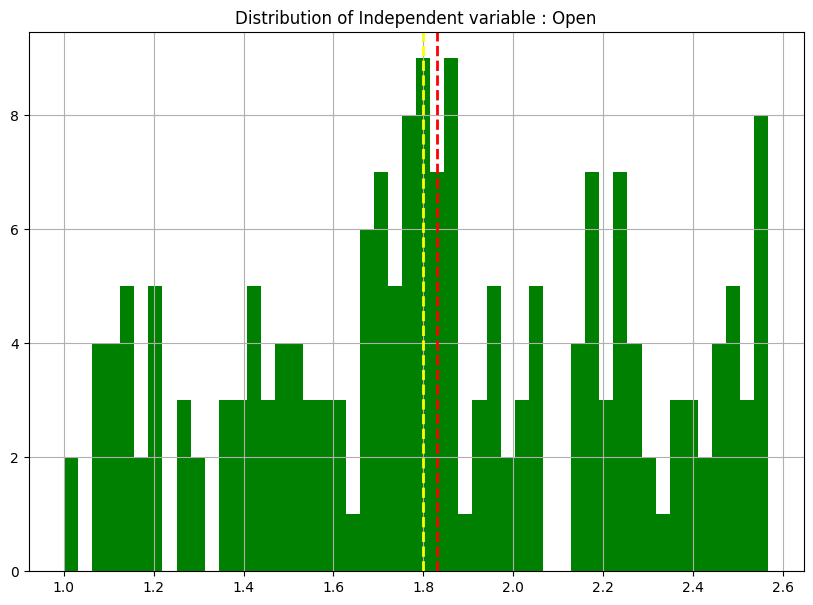

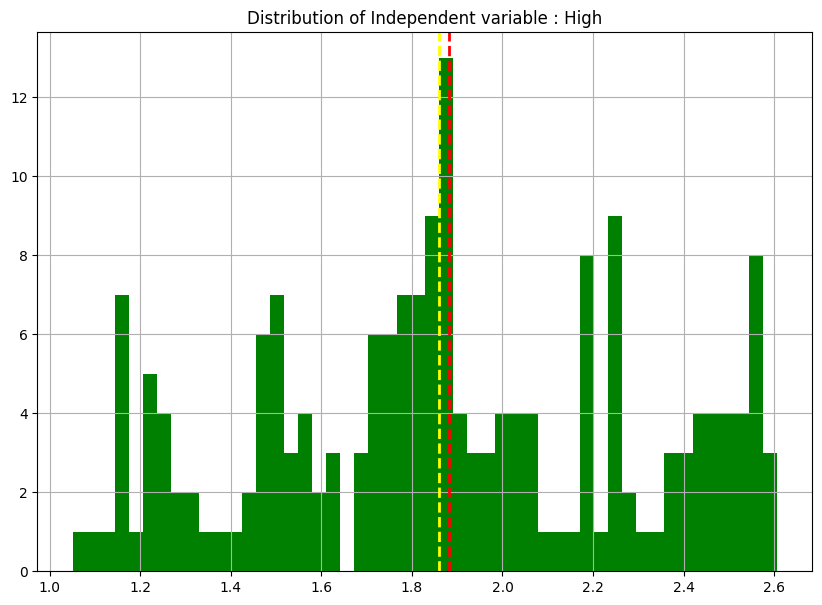

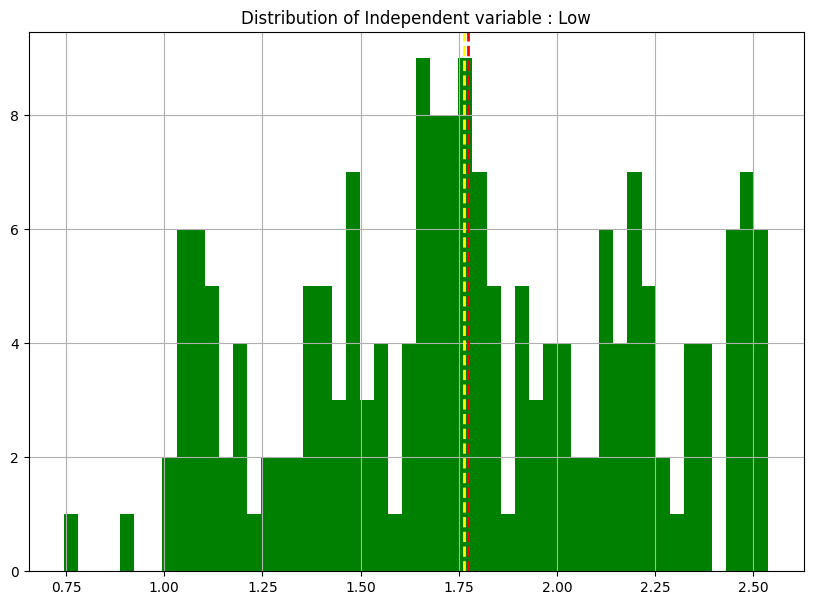

In [15]:
for i in numeric_features[1:-1] :
  # we have to exclude the Close(dependent variable) columns
    fig = plt.figure(figsize=(10, 7))
    ax = fig.gca()
    feature = np.log10(df[i])
    feature.hist(bins=50, ax = ax, color = 'green')
    ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='yellow', linestyle='dashed', linewidth=2)
    ax.set_title('Distribution of Independent variable :' + ' ' + i)
plt.show()

## Checking Linear Relationship between dependent and independent variable

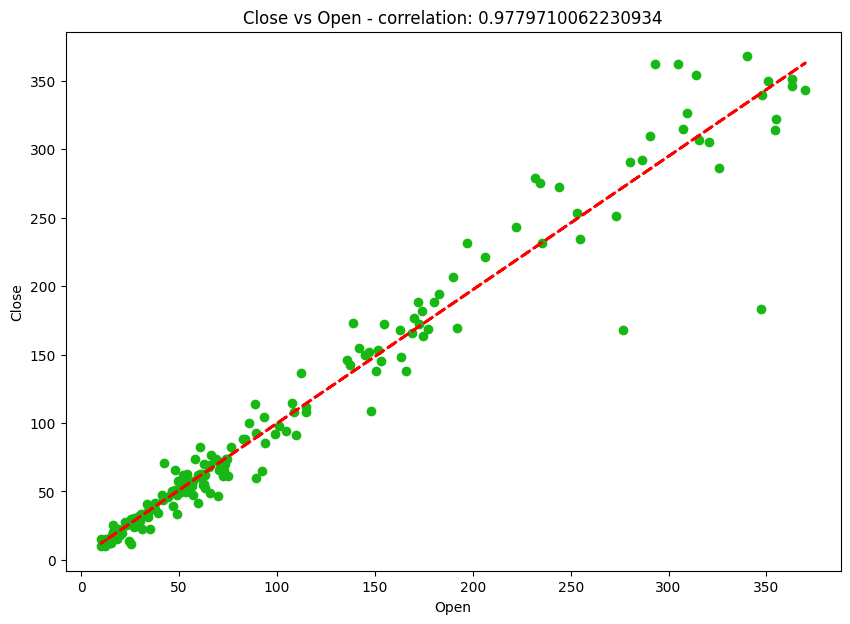

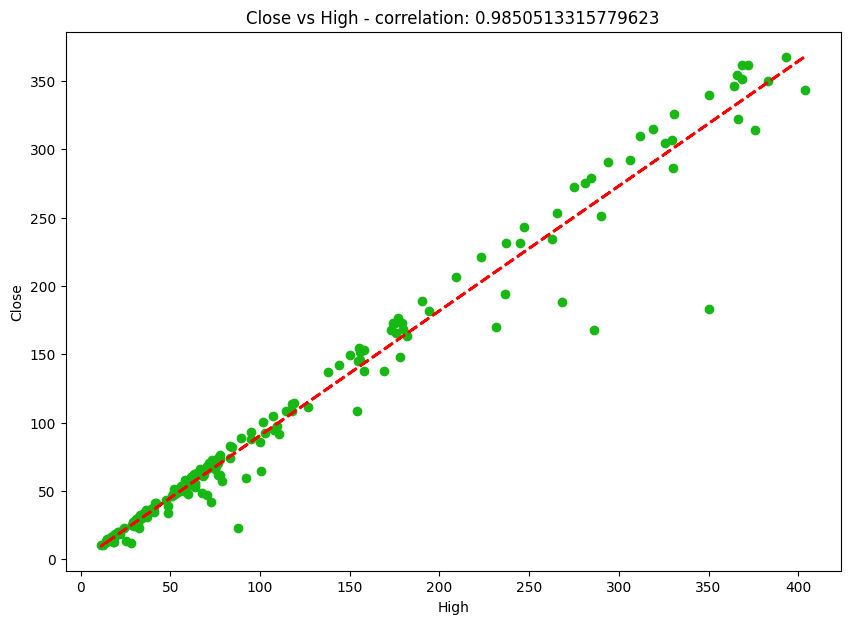

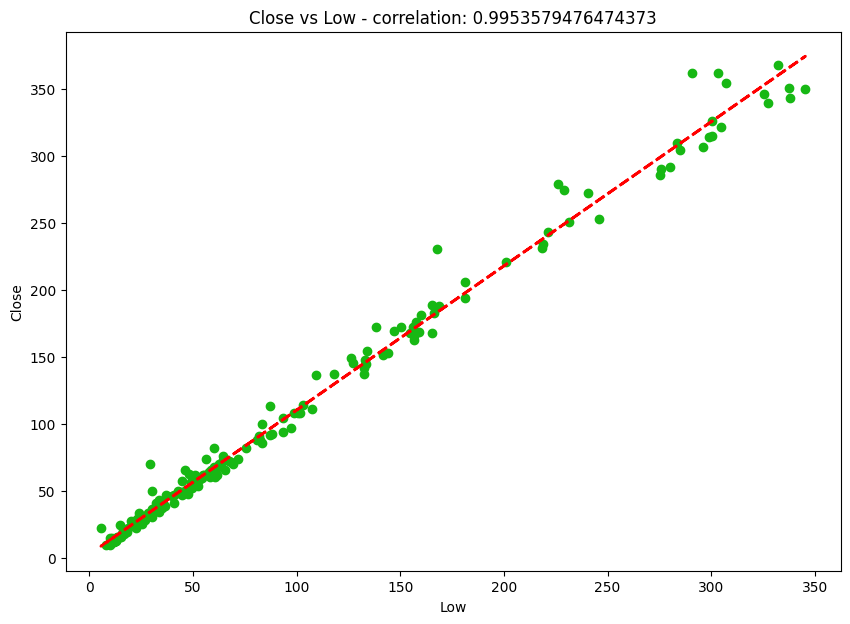

In [16]:
for i in numeric_features[1:-1]:
    fig = plt.figure(figsize=(10, 7))
    ax = fig.gca()   # this will help in plotting title
    feature = df[i]                     # Independent variables
    label = df['Close']                 # dependent variable
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label, color='#17b814')
    plt.xlabel(i)
    plt.ylabel('Close')
    ax.set_title('Close vs ' + i + ' ' + '- correlation: ' + str(correlation))
    z = np.polyfit(df[i], df['Close'], 1) # fits parameters for making linear equation of degree 1
    y_hat = np.poly1d(z)(df[i])           # y = mx + c

    plt.plot(df[i], y_hat, "r--", lw=2)  # lw = linewidth , r-- = redline

plt.show()

## Plotting Box plot to check the outliers

<Axes: >

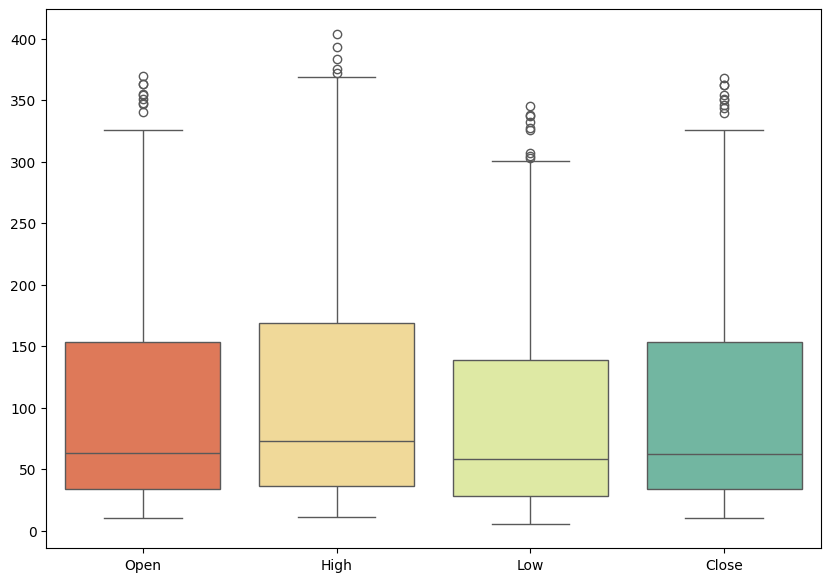

In [17]:
plt.rcParams['figure.figsize'] = (10,7)
sns.boxplot(data = df,palette="Spectral")

# Data Preprocessing

In [18]:
X = np.log10(df.iloc[:,1:-1])
y = np.log10(df['Close'])

# spliting the data

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

print('The shape of X_train is',X_train.shape)
print('The shape of X_test is',X_test.shape)
print('The shape of y_train is',y_train.shape)
print('The shape of y_test is',y_test.shape)

The shape of X_train is (148, 3)
The shape of X_test is (37, 3)
The shape of y_train is (148,)
The shape of y_test is (37,)


##  Implementing Models

In [20]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [25]:
y_pred=regressor.predict(X_test)

In [26]:
regressor.score(X_train,y_train)*100

99.47900553430551

In [27]:
regressor.score(X_test,y_test)*100

99.56268809883747

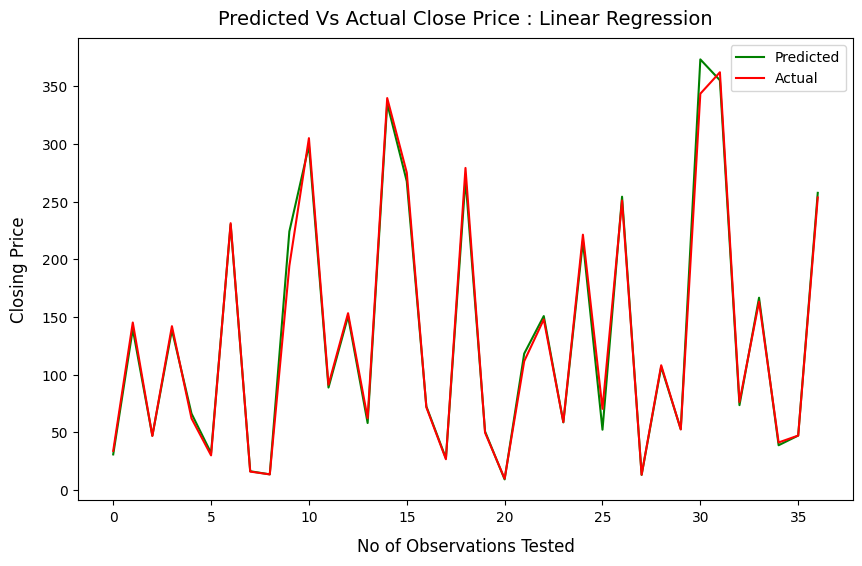

In [28]:
plt.figure(figsize=(10,6))
plt.plot(10**(y_pred),color = 'green')
plt.plot(np.array(10**(y_test)),color = 'red')
plt.legend(["Predicted","Actual"])
plt.title('Predicted Vs Actual Close Price : Linear Regression',fontsize = 14, pad = 10)
plt.xlabel('No of Observations Tested',fontsize = 12,labelpad = 10)
plt.ylabel('Closing Price',fontsize = 12,labelpad = 10)
plt.show()